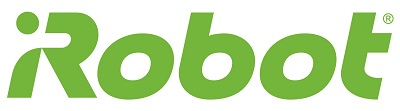

#Problem Overview 

Datasets that contains details of cleaning missions for a sample of 10,000 wifi-connected robots and details of the robot's geographic location are given in two datasets. 

There are a lot of business impacts which could be made by addressing three problems below.

1. Are there geographic differences in robot usage?

**The investigation of this problem would allow iRobot to better understand their customers and make customized design decisions for regions with a significant amount of existing iRobot owners. In this case, a more customized design could help improve customer engagement and satisfaction.** 

 

2.Calculate the time between consecutive missions for each robot ("inter-mission interval" or "IMI"). Describe any interesting relationships between IMI and other features of robot behavior.

**The investigation of this problem would allow iRobot to get a better understanding of user behavior and also have information about what to focus on in the future to meet the needs of customers' requests for a cleaning session and also maintain the performance and durability of future robots.**

3. BONUS: We are aware that data loss exists among the mission records, but are unsure of the cause. Quantify the extent of the loss, differentiating between discrete catastrophic events and random mission loss for individual robots. Investigate whether this loss is uniform or whether it may be impacting other analyses.

**The investigation of this problem could provide insights for the R&D and maintenance team into whether a robot experiences some random errors or catastrophic error events.**
 
*Insights and recommendations are included along with the code.*

# Load Data

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
geo_data = pd.read_csv('/content/drive/Shareddrives/OA/iRobot/geo_data.csv')
mission_data = pd.read_csv('/content/drive/Shareddrives/OA/iRobot/mission_data.csv')

In [ ]:
geo_data.head(2)

,country_cd,timezone,robotid
0,SE,Europe/Stockholm,T29NF13ZIYISNF79
1,JP,Asia/Tokyo,9S12V26O6G426OYR


In [ ]:
mission_data.head(2)

,robotid,datetime,nmssn,runm,chrgm,pausem,outcome
0,000NG2FMLJBT9ANZ,2017-10-01 16:17:22,40,3,1,2,stuck
1,000NG2FMLJBT9ANZ,2017-10-03 14:25:56,41,83,0,13,ok


In [ ]:
mission_data['datetime'] =pd.to_datetime( mission_data['datetime']) 

##    Exploratory Data Analysis & Data Preprocessing
Steps:


*   Join 2 datasets
*   Check missing values (Drop)
*   Extract year, month, day, hour ,week from "datetime"
*   Extract region from the "timezone" column
*   Narrow down the scope to better answer problems
*   Convert datetime to "%Y-%m-%d" format

Notes:

There are 72 rows with missing country_cd when inner join was used to join 2 datasets. Missing values are dropped at this moment. But they would be investigated to in a separate section to answer the third problem. 

Analysis would be done on data from America, Asia, Europe since they take up very significant amount of data compared to other regions. 

Date range of the entire dataset: 2015-12-31 to 2017-12-29

Month range of the entire dataset: 1-12

Hour range of the entire dataset: 0-23

In [ ]:
mission_geo_data2 = pd.merge(mission_data,geo_data , how = "inner", on= ['robotid'] ) 
mission_geo_data2['datetime'] =pd.to_datetime(mission_geo_data2['datetime']) 
mission_geo_data2.head(3)

,robotid,datetime,nmssn,runm,chrgm,pausem,outcome,country_cd,timezone
0,000NG2FMLJBT9ANZ,2017-10-01 16:17:22,40,3,1,2,stuck,IL,Asia/Jerusalem
1,000NG2FMLJBT9ANZ,2017-10-03 14:25:56,41,83,0,13,ok,IL,Asia/Jerusalem
2,000NG2FMLJBT9ANZ,2017-10-04 12:32:51,42,66,13,12,ok,IL,Asia/Jerusalem


In [ ]:
mission_geo_data2.isnull().sum()

robotid        0
datetime       0
nmssn          0
runm           0
chrgm          0
pausem         0
outcome        0
country_cd    72
timezone       0
dtype: int64

In [ ]:
print(mission_geo_data2[mission_geo_data2['country_cd'].isnull()].shape)

(72, 9)


In [ ]:
mission_geo_data2 = mission_geo_data2.dropna()

In [ ]:
mission_geo_data2['year'] = mission_geo_data2['datetime'].dt.year
mission_geo_data2['month'] = mission_geo_data2['datetime'].dt.month
mission_geo_data2['day'] = mission_geo_data2['datetime'].dt.day
mission_geo_data2['hour'] = mission_geo_data2['datetime'].dt.hour
mission_geo_data2['week'] = mission_geo_data2['datetime'].dt.week

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """


In [ ]:
mission_geo_data2['region'] = mission_geo_data2['timezone'].apply(lambda x: x.split('/')[0])
np.unique( mission_geo_data2['region'])

array(['Africa', 'America', 'Asia', 'Atlantic', 'Australia', 'Europe',
       'Pacific'], dtype=object)

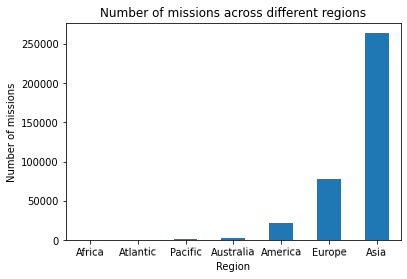

In [ ]:
mission_geo_data2.groupby('region').count().iloc[:,0].sort_values().plot.bar(rot=1)  # add main , title,    # maybe add a pie chart ， calculate the percentage

plt.title('Number of missions across different regions')
plt.ylabel('Number of missions')
plt.xlabel('Region')
plt.show()

In [ ]:
# Analysis would be done on data from America, Asia, Europe since they take up very significant amount of data compared to other regions. 
mission_geo_data2 = mission_geo_data2[mission_geo_data2['region'].isin(['America','Asia','Europe'])]

In [ ]:
print('date range of the entire dataset:' ,np.unique(mission_geo_data2.year))
print('month range of the entire dataset:',np.unique(mission_geo_data2.month))
print('hour range of the entire dataset:' ,np.unique(mission_geo_data2.hour))

date range of the entire dataset: [2015 2016 2017]
month range of the entire dataset: [ 1  2  3  4  5  6  7  8  9 10 11 12]
hour range of the entire dataset: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [ ]:
mission_geo_data2['datetime'] =mission_geo_data2['datetime'].apply( lambda x:  x.strftime("%Y-%m-%d")) 
mission_geo_data2['datetime'] = pd.to_datetime(mission_geo_data2['datetime'])

# Tasks

1. Are there geographic differences in robot usage?
  - Consider all descriptive features of a mission, including when and how frequently it occurred.
  - If applicable, comment on how trends in these features might impact design decisions for the hardware, battery, or navigation algorithms of robots sold in different regions.


# Hypotheses:

1.   The "Bat" outcome could be due to the inefficiency of the navigation algorithm.
2.   The mission number (nmssn) reflects accurate counts of missions to date reported to the database. 
3.   The "datetime" column follows the "timezone" as local time.
4.   Assume every mission reflects the necessity of cleaning 



##Strategy:



*   Calculate the average daily usage of robots in Asia, Europe, America 
*   Calculate and visualize the average daily value of "runm","chrgm","pausem" by region
*   Calculate and visualize the daily count of "outcome" by region
*   Investigate and visualize hourly usage by region
*   Visualize daily number of mission by region   






In [ ]:
# Calculate the average daily usage of robots Asia, Europe, America
asia_data =mission_geo_data2[mission_geo_data2['region'] =='Asia'].groupby('datetime').mean()
europe_data = mission_geo_data2[mission_geo_data2['region'] =='Europe'].groupby('datetime').mean()
america_data = mission_geo_data2[mission_geo_data2['region'] =='America'].groupby('datetime').mean()

In [ ]:
asia_data.describe()

,nmssn,runm,chrgm,pausem,year,month,day,hour,week
count,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000
mean,70.066480,49.727507,6.336634,6.862764,2016.498623,6.515152,15.692837,11.582667,26.586777
std,8.293144,3.250433,0.806401,0.715176,0.503092,3.455198,8.777283,0.769074,15.100675
min,40.214286,34.607143,0.000000,0.000000,2015.000000,1.000000,1.000000,1.911765,1.000000
25%,65.605009,48.552011,5.984493,6.534244,2016.000000,4.000000,8.000000,11.226023,13.250000
50%,71.475759,49.685966,6.336944,6.851799,2016.500000,7.000000,16.000000,11.676500,27.000000
75%,75.687098,50.977149,6.750155,7.205521,2017.000000,10.000000,23.000000,12.044649,40.000000
max,93.869118,111.000000,9.898876,12.090909,2017.000000,12.000000,31.000000,16.000000,53.000000



##Insights:


Visualizations below show that Asia, America and Europe all have a similar mean value of "rumn" , which is 50 mintues. 
The variance/ fluctation level of the time series is America > Europe > Asia.
Could be due to the area of cleaning. The average area per person in differnt country is different. 
users from Amercia could possibly have more areas to clean. In this case, due to the fluctation, it would be reasonalbe to make sure the battery capacity.

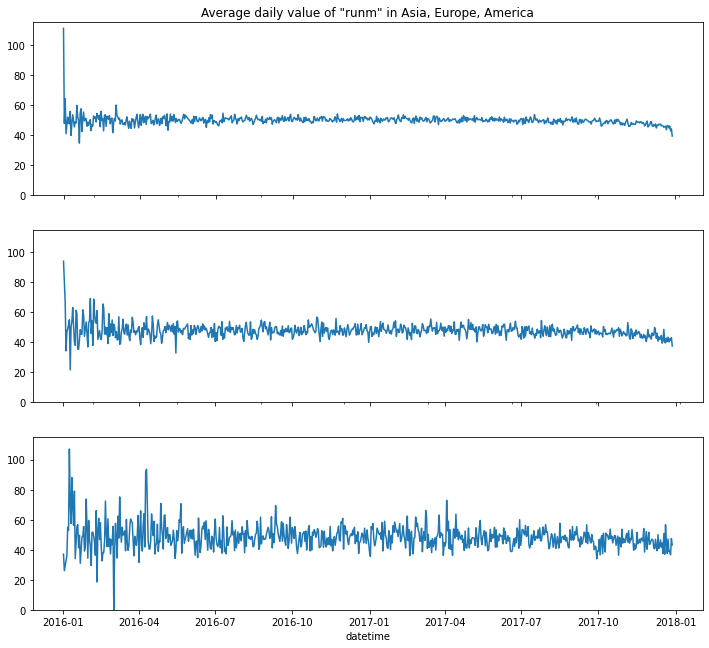

In [ ]:
# Visualize the average daily value of "runm" in 3 regions
figure, axes = plt.subplots(3, 1)
asia_data['runm'].plot(figsize=(12,12), ax=axes[0], ylim =(0,115), title= 'Average daily value of "runm" in Asia, Europe, America',subplots=False )
europe_data['runm'].plot(figsize=(12,12), ax=axes[1], ylim =(0,115), subplots=True,sharex=True)
america_data['runm'].plot(figsize=(12,12), ax=axes[2], ylim =(0,115),subplots=True)
plt.show()

## Insights


The data show that the time that robots spent charging in Asia is around 6.3, which is different from the other two regions.

The other two grpahs seems to fluctuate around 2.This could be due to the quality/performance of the battery since Asia has different climate and temperature from other regions. Additionally, this may be due to the volatge difference in different regions.

**Design Team should investigate if iRobot receive a lot of complaints about waiting too long the robot to charge and resume. For better performanace, this issue shoudl be addressed.**


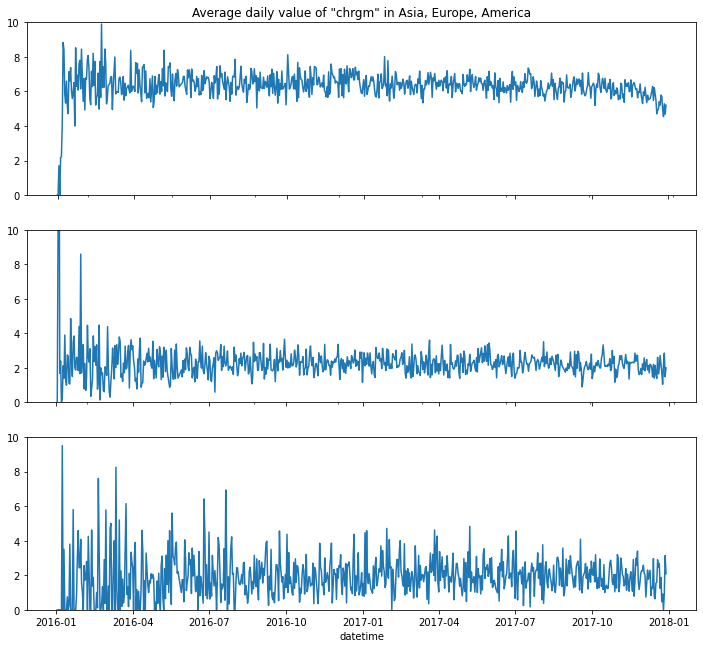

In [ ]:
# For the charge chrgm
figure, axes = plt.subplots(3, 1)
asia_data['chrgm'].plot(figsize=(12,12), ax=axes[0], ylim =(0,10)  , title= 'Average daily value of "chrgm" in Asia, Europe, America',subplots=False )
europe_data['chrgm'].plot(figsize=(12,12), ax=axes[1], ylim =(0,10), subplots=True,sharex=True)
america_data['chrgm'].plot(figsize=(12,12), ax=axes[2], ylim =(0,10), subplots=True)
plt.show()


## Insight 
This following visualizatio shows that there might be some hardware issues. The engineering team may want to check if these robot are using the same code. But give out different performance. The trash container might be  too small. So users need to dump the trash.

Besides, Roomba has a sensor in the dirt bin that tells it to stop when its full. The sensor could be either oversensitive.

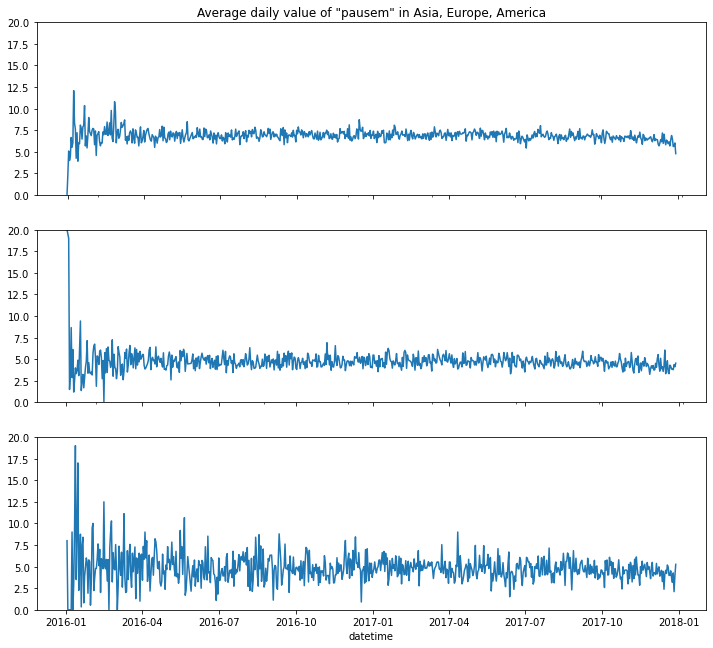

In [ ]:
# For the pausem
figure, axes = plt.subplots(3, 1)
asia_data['pausem'].plot(figsize=(12,12), ax=axes[0], ylim =(0,20) , title= 'Average daily value of "pausem" in Asia, Europe, America',subplots=False )
europe_data['pausem'].plot(figsize=(12,12), ax=axes[1], ylim =(0,20), subplots=True,sharex=True)
america_data['pausem'].plot(figsize=(12,12), ax=axes[2], ylim =(0,20), subplots=True)

plt.show()


## Insights
Users in Europe and America show a relatively similar usage pattern. 
The count of "ok" and "cncl" are different for them. 
**However, users in Asia have a different pattern compared to other regions, so I generate a separate plot below.** Their count of "ok" and "cncl" are very close to each other. This shows that a pattern that is worth investigating because some cleaning sessions were initiated but terminated by the users. I would recommend that the mechanism and electronics of the start button should be investigated for the models sold in Asia. 

Regardless of the regions, the count of "stuck" and "bat" for all three regions are similar and small throughout the time. 


In [ ]:
# Visualize the daily count of "outcome" in 3 regions
asia_data_outcome =mission_geo_data2[mission_geo_data2['region'] =='Asia'].groupby(['datetime','outcome'])['robotid'].count()
europe_data_outcome =mission_geo_data2[mission_geo_data2['region'] =='Europe'].groupby(['datetime','outcome'])['robotid'].count()
america_data_outcome =  mission_geo_data2[mission_geo_data2['region'] =='Europe'].groupby(['datetime','outcome'])['robotid'].count()

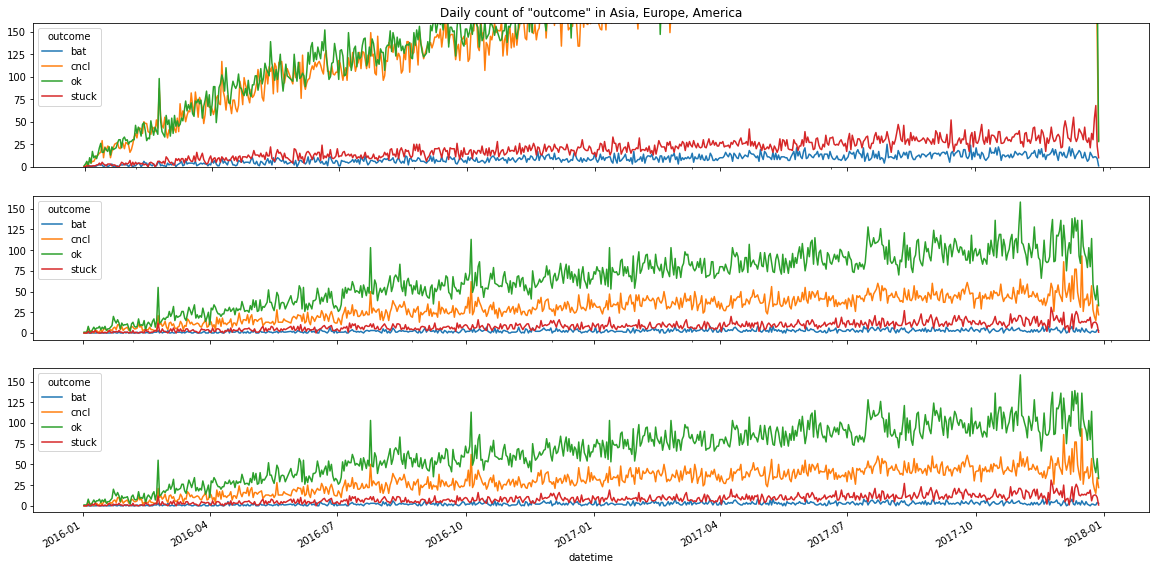

In [ ]:
figure, axes = plt.subplots(3, 1)
asia_data_outcome.unstack().fillna(0).plot( ax=axes[0] ,figsize=(20,10) ,ylim=(0,160), title= 'Daily count of "outcome" in Asia, Europe, America',subplots=False )
europe_data_outcome.unstack().fillna(0).plot(ax=axes[1] ,figsize=(20,10),  sharex=True) 
america_data_outcome.unstack().fillna(0).plot( ax=axes[2] ,figsize=(20,10) )
plt.show()

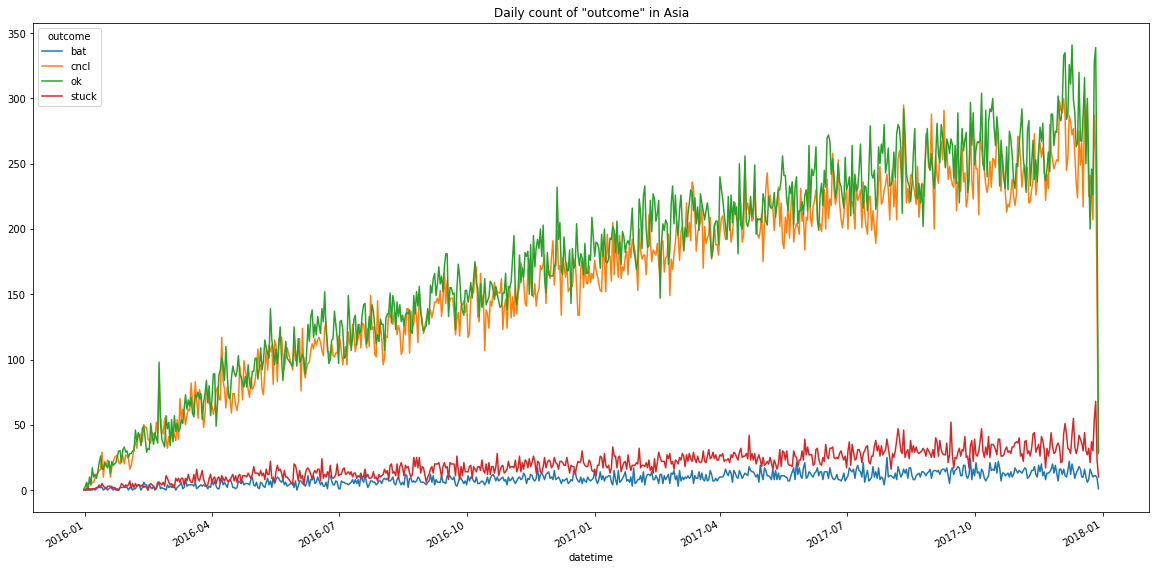

In [ ]:
# Asia has a different pattern compared to other regions, so I generate a separate plot here.   
asia_data_outcome.unstack().fillna(0).plot(figsize=(20,10), title= 'Daily count of "outcome" in Asia') 
plt.show()

## Insights

Users in Asia shows a great amount of usage from 6:00-7:00, 13:00-16:00,23:00


Users in Europe shows a great amount of usage from 23:00-00:00, 13:00-16:00


Users in America shows a great amount of usage from 6:00-9:00, 16:00-18:00


In [ ]:
# mission_hour_usage_by_region
mission_hour_usage_by_region =  mission_geo_data2.groupby(['region','hour']).count()['robotid'].unstack(level = 0)

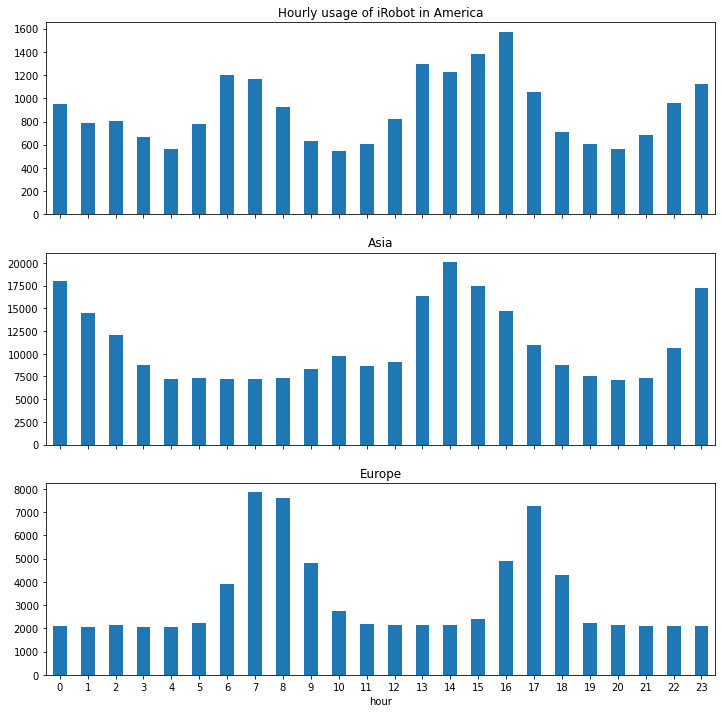

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=1)

mission_hour_usage_by_region["America"].plot(ax=axes[0], kind='bar', figsize=(12,12) , title= 'Hourly usage of iRobot in America',subplots=False,rot=0 )  # Set title   # rotate the axis 
mission_hour_usage_by_region["Asia"].plot(ax=axes[1], kind='bar', figsize=(12,12),subplots=True,rot=0, sharex= True )
mission_hour_usage_by_region["Europe"].plot(ax=axes[2], kind='bar', figsize=(12,12),subplots=True,rot=0)
plt.show()

## Insights 
This following graph shows a great amount of missions intiatived by users in Asia. 
This is pattern could be due to:


*   Strong growth of users in Asia
*   Users in Asia tend to have a higher need of cleaning. 

**Compared to other regions, Asia shows a great market to explore. 
Europe shows a higher trend than that of America.** 


 

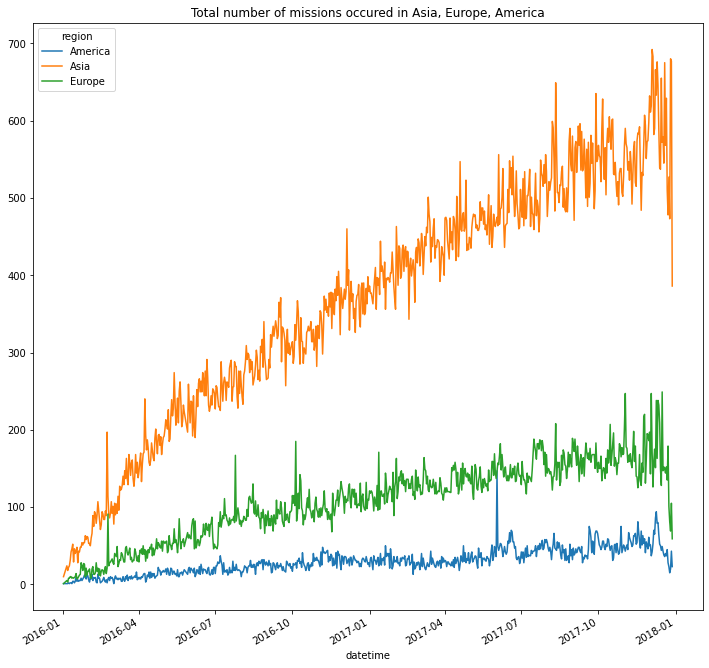

In [ ]:
# total number of mission occured on every day   
mission_day_usage_by_region = mission_geo_data2.groupby(['region','datetime']).count()['robotid'].unstack(level = 0)
mission_day_usage_by_region=mission_day_usage_by_region.dropna()
# mission_day_usage_by_region
mission_day_usage_by_region.plot(figsize=(12,12) , title= 'Total number of missions occured in Asia, Europe, America')
plt.show()





# Task 2. 
Calculate the time between consecutive missions for each robot ("inter-mission interval" or "IMI"). Describe any interesting relationships between IMI and other features of robot behavior.

## Strategy 



*   Sgement the data into Asia, Europe, America
*   Sort by robotid and datetime 
*   Get the unique robotid in each region
*   Calculate IMI and correlation matrix for each region
*   Create heatmap for each correlation matrix 
*   Create scatterplot to visualize the relationship between IMI and other variables





In [ ]:
import seaborn as sns

In [ ]:
# mission_geo_data2['datetime'] =mission_geo_data2['datetime'].apply( lambda x:  x.strftime("%Y-%m-%d")) 
# mission_geo_data2['datetime'] = pd.to_datetime(mission_geo_data2['datetime'])

In [ ]:
asia_data =mission_geo_data2[mission_geo_data2['region'] =='Asia'].sort_values( ['robotid', 'datetime']) 
europe_data = mission_geo_data2[mission_geo_data2['region'] =='Europe'].sort_values( ['robotid', 'datetime']) 
america_data = mission_geo_data2[mission_geo_data2['region'] =='America'].sort_values( ['robotid', 'datetime']) 

In [ ]:
asia_robot_list = list(np.unique( asia_data['robotid']))
europe_robot_list = list(np.unique( europe_data['robotid']))
america_robot_list = list(np.unique( america_data['robotid']))


In [ ]:
def get_IMI( robot_list ,data ):
  temp =pd.DataFrame()
  for i in robot_list:
    temp2 = data[data['robotid'] ==i][['robotid', 'datetime']] 
    temp2['shifted_datetime'] = temp2['datetime'].shift()
    temp2['IMI'] =  temp2['datetime']- temp2['shifted_datetime']   # shift the datetime column and get the difference
    #print(temp2)
    temp2 = temp2['IMI']   # temp2[['robotid','datetime','IMI']] 
    temp = pd.concat( [temp,temp2])
  return temp

In [ ]:
asia_data_IMI = get_IMI(robot_list= asia_robot_list,data= asia_data)
europe_data_IMI = get_IMI(robot_list= europe_robot_list,data= europe_data) 
america_data_IMI = get_IMI(robot_list= america_robot_list,data= america_data)     

In [ ]:
asia_data_IMI_total = asia_data.merge(asia_data_IMI,left_index=True, right_index=True)
asia_data_IMI_total=asia_data_IMI_total.rename(columns = {0:'IMI'})
asia_data_IMI_total = asia_data_IMI_total.dropna()
asia_data_IMI_total['IMI'] = asia_data_IMI_total['IMI'].apply(lambda x: int(str(x).split()[0]))

In [ ]:
europe_data_IMI_total = europe_data.merge(europe_data_IMI,left_index=True, right_index=True)
europe_data_IMI_total=europe_data_IMI_total.rename(columns = {0:'IMI'})
europe_data_IMI_total = europe_data_IMI_total.dropna()
europe_data_IMI_total['IMI'] = europe_data_IMI_total['IMI'].apply(lambda x: int(str(x).split()[0]))

In [ ]:
america_data_IMI_total = america_data.merge(america_data_IMI,left_index=True, right_index=True)
america_data_IMI_total=america_data_IMI_total.rename(columns = {0:'IMI'})
america_data_IMI_total = america_data_IMI_total.dropna()
america_data_IMI_total['IMI'] = america_data_IMI_total['IMI'].apply(lambda x: int(str(x).split()[0]))

## Insights 
The following heat maps show that IMI has a negative correlation with nmssn and month for Asia, Europe, and America. This means when "month" increases, IMI would decrease. When it gets closer to the end of a year, people tend to use the robot more frequently (with a smaller time interval between each session). When nmssn increases, users also tend to use the robot more frequently. 
However, when runm,chrgm,pausem increases, users tend to use the robot less frequently. 
Four scatter plots are also included just to show the relationship between IMI and other features. Since three regions show similar patterns in this section, I turn the scatter plots for other regions into comments. 

**I would recommend that iRobot could send emails to customers to reach out to them for feedbacks and make sure they have enough customer support. At the same time, it would be helpful to target those customers with new products or promotions.**

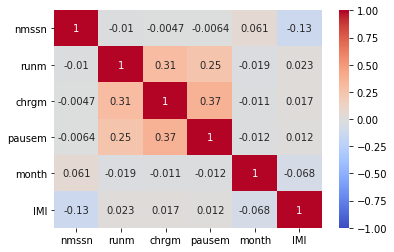

In [ ]:
sns.heatmap(asia_data_IMI_total[[ 	'nmssn'	,'runm',	'chrgm','pausem','month'	,'IMI']].corr()  , cmap='coolwarm' , annot = True, vmin=-1, vmax=1, center= 0)

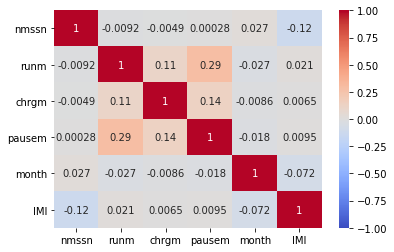

In [ ]:
sns.heatmap(europe_data_IMI_total[[ 	'nmssn'	,'runm',	'chrgm','pausem','month'	,'IMI']].corr()  , cmap='coolwarm' , annot = True, vmin=-1, vmax=1, center= 0) 
# sns.heatmap(europe_data_IMI_total[[ 	'nmssn'	,'runm',	'chrgm','pausem','month'	,'IMI']].corr()  , cmap='coolwarm')

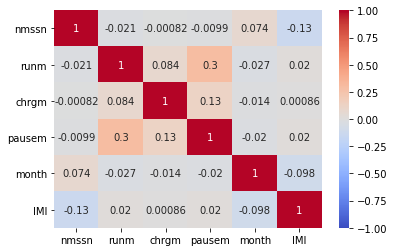

In [ ]:
sns.heatmap(america_data_IMI_total[[ 	'nmssn'	,'runm',	'chrgm','pausem','month'	,'IMI']].corr()  , cmap='coolwarm' , annot = True, vmin=-1, vmax=1, center= 0) 
#sns.heatmap(america_data_IMI_total[[ 	'nmssn'	,'runm',	'chrgm','pausem','month'	,'IMI']].corr()  , cmap='coolwarm')

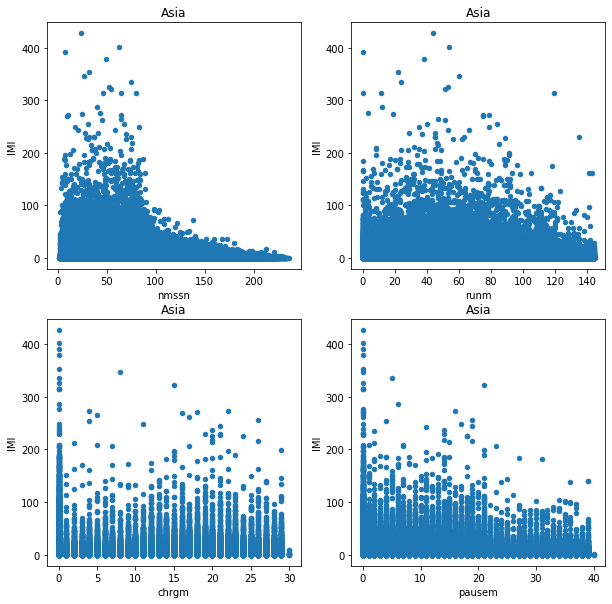

In [ ]:
figure, axes = plt.subplots(2, 2)
asia_data_IMI_total.plot.scatter(  x = 'nmssn' , y = 'IMI' , ax=axes[0,0] , figsize=(10, 10), title= 'Asia')
asia_data_IMI_total.plot.scatter(  x = 'runm' , y =  'IMI', ax=axes[0,1] , figsize=(10, 10), title= 'Asia')
asia_data_IMI_total.plot.scatter(  x = 'chrgm' , y = 'IMI', ax=axes[1,0] , figsize=(10, 10), title= 'Asia')
asia_data_IMI_total.plot.scatter(  x = 'pausem' , y = 'IMI', ax=axes[1,1] , figsize=(10, 10), title= 'Asia')

# figure, axes = plt.subplots(2, 2)
# europe_data_IMI_total.plot.scatter(  x = 'nmssn' , y = 'IMI' , ax=axes[0,0] , figsize=(10, 10), title= 'Europe')
# europe_data_IMI_total.plot.scatter(  x = 'runm' , y =  'IMI', ax=axes[0,1] , figsize=(10, 10), title= 'Europe')
# europe_data_IMI_total.plot.scatter(  x = 'chrgm' , y = 'IMI', ax=axes[1,0] , figsize=(10, 10), title= 'Europe')
# europe_data_IMI_total.plot.scatter(  x = 'pausem' , y = 'IMI', ax=axes[1,1] , figsize=(10, 10), title= 'Europe')

# figure, axes = plt.subplots(2, 2)
# america_data_IMI_total.plot.scatter(  x = 'nmssn' , y = 'IMI' , ax=axes[0,0] , figsize=(10, 10), title= 'America')
# america_data_IMI_total.plot.scatter(  x = 'runm' , y =  'IMI', ax=axes[0,1] , figsize=(10, 10), title= 'America')
# america_data_IMI_total.plot.scatter(  x = 'chrgm' , y = 'IMI', ax=axes[1,0] , figsize=(10, 10), title= 'America')
# america_data_IMI_total.plot.scatter(  x = 'pausem' , y = 'IMI', ax=axes[1,1] , figsize=(10, 10), title= 'America')

## Additional Insight

Havine the mode to be 1 means a lot of people would use the robot the next day if they use it on certain day.

In [ ]:
# Get the mode of IMI of users in America
america_data_IMI_total[america_data_IMI_total['IMI']!=0]['IMI'].mode() # mode is 1 

0    1
dtype: int64

In [ ]:
# Get the mode of IMI of users in Asia
asia_data_IMI_total[asia_data_IMI_total['IMI']!=0]['IMI'].mode() # mode is 1 

0    1
dtype: int64

In [ ]:
#  dict(collections.Counter(asia_data_IMI_total[asia_data_IMI_total['IMI']!=0]['IMI'])) 

In [ ]:
# Get the mode of IMI of users in Europe
europe_data_IMI_total[europe_data_IMI_total['IMI']!=0]['IMI'].mode() # mode is 1 

0    1
dtype: int64

#Task 3.
 **BONUS**: We are aware that data loss exists among the mission records, but are unsure of the cause. Quantify the extent of the loss, differentiating between discrete catastrophic events and random mission loss for individual robots. Investigate whether this loss is uniform or whether it may be impacting other analyses.




##Strategy



*   User outer join to combine 2 datasets 
*   Divide the missing values into 2 categories
*   Investigate the first category
*   Investigate the second category





 

In [ ]:
mission_geo_data = pd.merge(mission_data,geo_data , how = "outer", on= ['robotid'] )  # Use outer join to combine 2 datasets

In [ ]:
print(geo_data.shape)
print(mission_data.shape)
print(mission_geo_data.shape)

(10000, 3)
(367679, 7)
(367853, 9)


In [ ]:
mission_geo_data.isnull().sum() # Find missing values

robotid         0
datetime      174
nmssn         174
runm          174
chrgm         174
pausem        174
outcome       174
country_cd     72
timezone        0
dtype: int64

In [ ]:
missing_data = mission_geo_data[pd.isnull(mission_geo_data).any(axis=1)]  # Filter and find out rows with missing values 

##Divide missing values into two categories.  

1.   Missing country_cd
2.   Missing mission information



In [ ]:
missing_data_country_cd= missing_data[missing_data['country_cd'].isnull()]
missing_data_country_cd.head()

,robotid,datetime,nmssn,runm,chrgm,pausem,outcome,country_cd,timezone
272312,QMJXZLREE88GULA1,2016-01-16 17:51:43,69.0,75.0,0.0,16.0,ok,NaN,Europe/Vaduz
272313,QMJXZLREE88GULA1,2016-03-27 01:30:16,70.0,68.0,0.0,15.0,ok,NaN,Europe/Vaduz
272314,QMJXZLREE88GULA1,2016-04-08 09:31:33,71.0,60.0,0.0,0.0,ok,NaN,Europe/Vaduz
272315,QMJXZLREE88GULA1,2016-04-08 07:26:35,72.0,58.0,0.0,12.0,ok,NaN,Europe/Vaduz
272316,QMJXZLREE88GULA1,2016-04-25 06:13:15,74.0,68.0,0.0,0.0,bat,NaN,Europe/Vaduz


In [ ]:
missing_data.tail()

,robotid,datetime,nmssn,runm,chrgm,pausem,outcome,country_cd,timezone
367848,C621839HMMFN1NPV,NaT,NaN,NaN,NaN,NaN,NaN,AT,Europe/Vienna
367849,Q8ITWOAQ8192ULQ3,NaT,NaN,NaN,NaN,NaN,NaN,AT,Europe/Vienna
367850,6GX3RIBH0S2S0ZR5,NaT,NaN,NaN,NaN,NaN,NaN,DE,Europe/Berlin
367851,SI000OFJNVDT212Q,NaT,NaN,NaN,NaN,NaN,NaN,IL,Asia/Jerusalem
367852,W8GZZ827WDWENZBO,NaT,NaN,NaN,NaN,NaN,NaN,RU,Europe/Moscow


## Investigate the first category

In [ ]:
print( 'Id of robots with missing country_cd',   np.unique(missing_data_country_cd['robotid']) ) 

Id of robots with missing country_cd ['QMJXZLREE88GULA1' 'Z9JJM7JRIGJYLER2']


In [ ]:
print('Timezone information of robot with missing country_cd', np.unique(missing_data_country_cd['timezone']) ) 

Timezone information of robot with missing country_cd ['Africa/Windhoek' 'Europe/Vaduz']


In [ ]:
geo_data[geo_data['timezone']=='Europe/Vaduz'] 

,country_cd,timezone,robotid
6091,NaN,Europe/Vaduz,QMJXZLREE88GULA1
9657,NO,Europe/Vaduz,JCU2B100T9CTZT7L


In [ ]:
geo_data[geo_data['timezone']=='Europe/Vaduz'] 

,country_cd,timezone,robotid
6091,NaN,Europe/Vaduz,QMJXZLREE88GULA1
9657,NO,Europe/Vaduz,JCU2B100T9CTZT7L


##Insights 

For the Europe/Vaduz case, Vaduz is the capital of Liechtenstein. The 2 letter ISO country code should be "LI" for Liechtenstein.
Reference: https://www.nationsonline.org/oneworld/country_code_list.htm

In [ ]:
geo_data[geo_data['timezone']=='Africa/Windhoek'] 

,country_cd,timezone,robotid
6363,NaN,Africa/Windhoek,Z9JJM7JRIGJYLER2


In [ ]:
missing_data_country_cd[missing_data_country_cd['robotid']=='Z9JJM7JRIGJYLER2'].head(3)

,robotid,datetime,nmssn,runm,chrgm,pausem,outcome,country_cd,timezone
359920,Z9JJM7JRIGJYLER2,2017-08-13 09:21:14,68.0,52.0,0.0,0.0,ok,NaN,Africa/Windhoek
359921,Z9JJM7JRIGJYLER2,2017-08-17 13:25:25,70.0,83.0,0.0,18.0,ok,NaN,Africa/Windhoek
359922,Z9JJM7JRIGJYLER2,2017-08-18 11:17:41,71.0,82.0,0.0,0.0,ok,NaN,Africa/Windhoek


##Suggestions
Windhoek is the capital of Namibia. The country code of Namibia is a string "NA". NA usually means "not available" in a data file. This could be fixed by update the database.

## Investigate the 2nd category (Robots didn't have mission information )
Strategy:


*   Find out how many robots were sold in each timezone
*   Find out number of the robots didn't have NAN for their missions
*   Calculate the percentage. 

#Insights
 The 2nd category corresponds to the discrete catastrophic events since robots in this category did not have any mission information. I recommend that we should look into Asia/Mania since that region has the highest percentage of the occurence of the discrete catastropic events (7%). Other regions have a relatively low percentage of the occurence of the discrete catastropic events.  







In [ ]:
import collections

In [ ]:
missing_data_mission_features= missing_data[missing_data['runm'].isnull()]
missing_data_mission_features.head(3)  # These robots didn't have mission information 

,robotid,datetime,nmssn,runm,chrgm,pausem,outcome,country_cd,timezone
367679,DA5UQG85EEKEW2DF,NaT,NaN,NaN,NaN,NaN,NaN,IL,Asia/Jerusalem
367680,ZF0UQ3IILJD7KTJZ,NaT,NaN,NaN,NaN,NaN,NaN,AT,Europe/Vienna
367681,084OZMRE7S1Y8ZR8,NaT,NaN,NaN,NaN,NaN,NaN,IL,Asia/Jerusalem


In [ ]:
print('Number of robots with missing mission information:', len(np.unique(missing_data_mission_features['robotid'])))

Number of robots with missing mission information: 174


In [ ]:
print('Number of unique timezones:',len(np.unique(missing_data_mission_features['timezone'])) )

Number of unique timezones: 28


In [ ]:
missing_data_mission_features_dict =  dict(collections.Counter( missing_data_mission_features['timezone']))
missing_data_mission_features_df = pd.Series(missing_data_mission_features_dict).to_frame()   
missing_data_mission_features_df= missing_data_mission_features_df.rename(columns = {0:'number of robot'}) # number of robot with missing session
missing_data_mission_features_df.head()

,number of robot
Asia/Jerusalem,110
Europe/Vienna,8
Europe/Moscow,3
Europe/Warsaw,3
Asia/Tokyo,5


In [ ]:
# Find the number of robots in each country
mission_geo_data_total_number_of_mission = pd.DataFrame(mission_geo_data.groupby('timezone')['robotid'].count())
mission_geo_data_total_number_of_mission= mission_geo_data_total_number_of_mission.rename(columns = {'robotid':'number of robot'})

In [ ]:
# Merge and calculate the percentage of having robots with missing mission information
missing_data_mission_features_df = pd.merge(mission_geo_data_total_number_of_mission,missing_data_mission_features_df , how = "inner", left_index=True, right_index=True ) 
missing_data_mission_features_df['percentage'] = 100*missing_data_mission_features_df['number of robot_y']/missing_data_mission_features_df['number of robot_x']

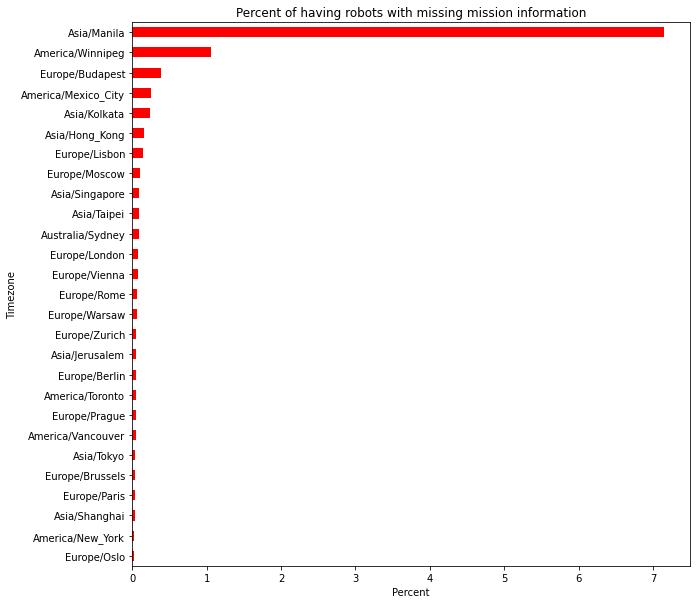

In [ ]:
missing_data_mission_features_df[missing_data_mission_features_df['percentage'] != 100]['percentage'].sort_values().plot.barh(color= "red", x='percentage' , figsize=(10, 10))
plt.title('Percent of having robots with missing mission information')
plt.xlabel('Percent')
plt.ylabel('Timezone')
plt.show()

**All in all, I would say there is significant difference in usage in Asia compared to Europe and America. Robots in Asia shows a high value for "Pausem". Engineering team should investigate to find out the reason and customer support team should check if they receive much more complaints from Asia. This could be a great way to increase customer engagement and satisfaction. Marketing team could also spend more time targeting potential customers in Asia because of the growth of usage from Asia. Catastrophic or random error events could be determined by looking at what values are missing and how frequently that occurs.**

 